#Coffee data EDA 

##This project is based on coffee dataset found on [kaggle.com](https://www.kaggle.com/datasets/michals22/coffee-dataset).

Linked dataset is composed of 7 tables, but I decided to investigate more further four of them: 
*import
*export
*production
*domestic consumption 
and get insights from the data. 


###Importing helpful libraries

In [432]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set_style("darkgrid")

###Analysis of import

In [433]:
df_import = pd.read_csv('Coffee_import.csv')
df_import.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_import
0,Austria,112800000,123480000,132360000,110160000,85020000,73860000,72600000,77640000,77580000,...,87120000,93540000,93300000,91500000,90780000,89700000,87600000,85740000,86880000,2765760000
1,Belgium,0,0,0,0,0,0,0,0,0,...,349680000,340080000,330120000,312720000,332040000,363120000,340620000,344520000,371940000,6240540000
2,Belgium/Luxembourg,120900000,104760000,109680000,123780000,135720000,144060000,151560000,152640000,214800000,...,0,0,0,0,0,0,0,0,0,1257900000
3,Bulgaria,16080000,12000000,10920000,23820000,27780000,30900000,16320000,17640000,20520000,...,28920000,33600000,36540000,37260000,40920000,46740000,42420000,44220000,47100000,830700000
4,Croatia,0,0,10080000,9780000,11580000,19200000,19320000,23100000,20340000,...,23460000,23040000,24780000,25200000,26220000,28740000,26340000,26760000,27960000,622080000


In [434]:
print('We have ' + str(df_import.shape) + ' rows and columns respectively.')

We have (35, 32) rows and columns respectively.


In [435]:
df_import[['Total_import']].describe()

,Total_import
count,3.500000e+01
mean,5.069693e+09
std,8.850559e+09
min,2.970000e+07
25%,5.573100e+08
50%,1.640040e+09
75%,5.841240e+09
max,4.250766e+10


In [436]:
df_import.isnull().values.any()

False

In [437]:
top10_import = df_import[['Country', 'Total_import']].sort_values(by=['Total_import'], ascending=False).head(10)
top10_import

,Country,Total_import
34,United States of America,42507660000
11,Germany,31481400000
15,Italy,13272120000
28,Japan,12422760000
10,France,11972520000
26,Spain,7840620000
33,United Kingdom,6731460000
1,Belgium,6240540000
20,Netherlands,5951400000
30,Russian Federation,5731080000


Text(0.5, 1.0, 'Top 10 importers')

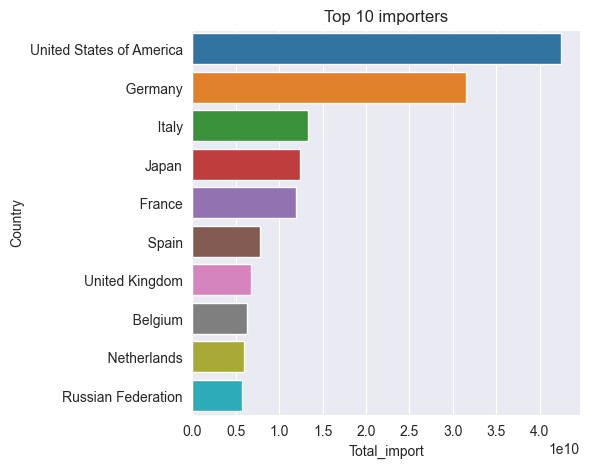

In [438]:
fig, ax = plt.subplots(figsize=(5,5))
g=sns.barplot(data=top10_import, x='Total_import', y='Country')
g.set_title("Top 10 importers")

In [439]:

top_import1 = df_import[['Country', 'Total_import']].sort_values(by=['Total_import'], ascending=False).head(5)
top_importers = df_import[df_import.Country.isin(top_import1['Country'].unique())]
top_importers = top_importers.T
top_importers.drop(['Country', 'Total_import'], axis=0, inplace=True)
top_importers.index.name = 'Year'
top_importers.columns = top_import1['Country'].values
top_importers.head()


,United States of America,Germany,Italy,Japan,France
Year,,,,,
1990,378060000,820260000,314520000,319800000,1260420000
1991,393180000,793740000,277800000,330600000,1190400000
1992,396720000,827340000,275700000,319560000,1376340000
1993,380040000,846420000,335640000,341460000,1159740000
1994,382140000,814980000,333240000,373020000,970260000


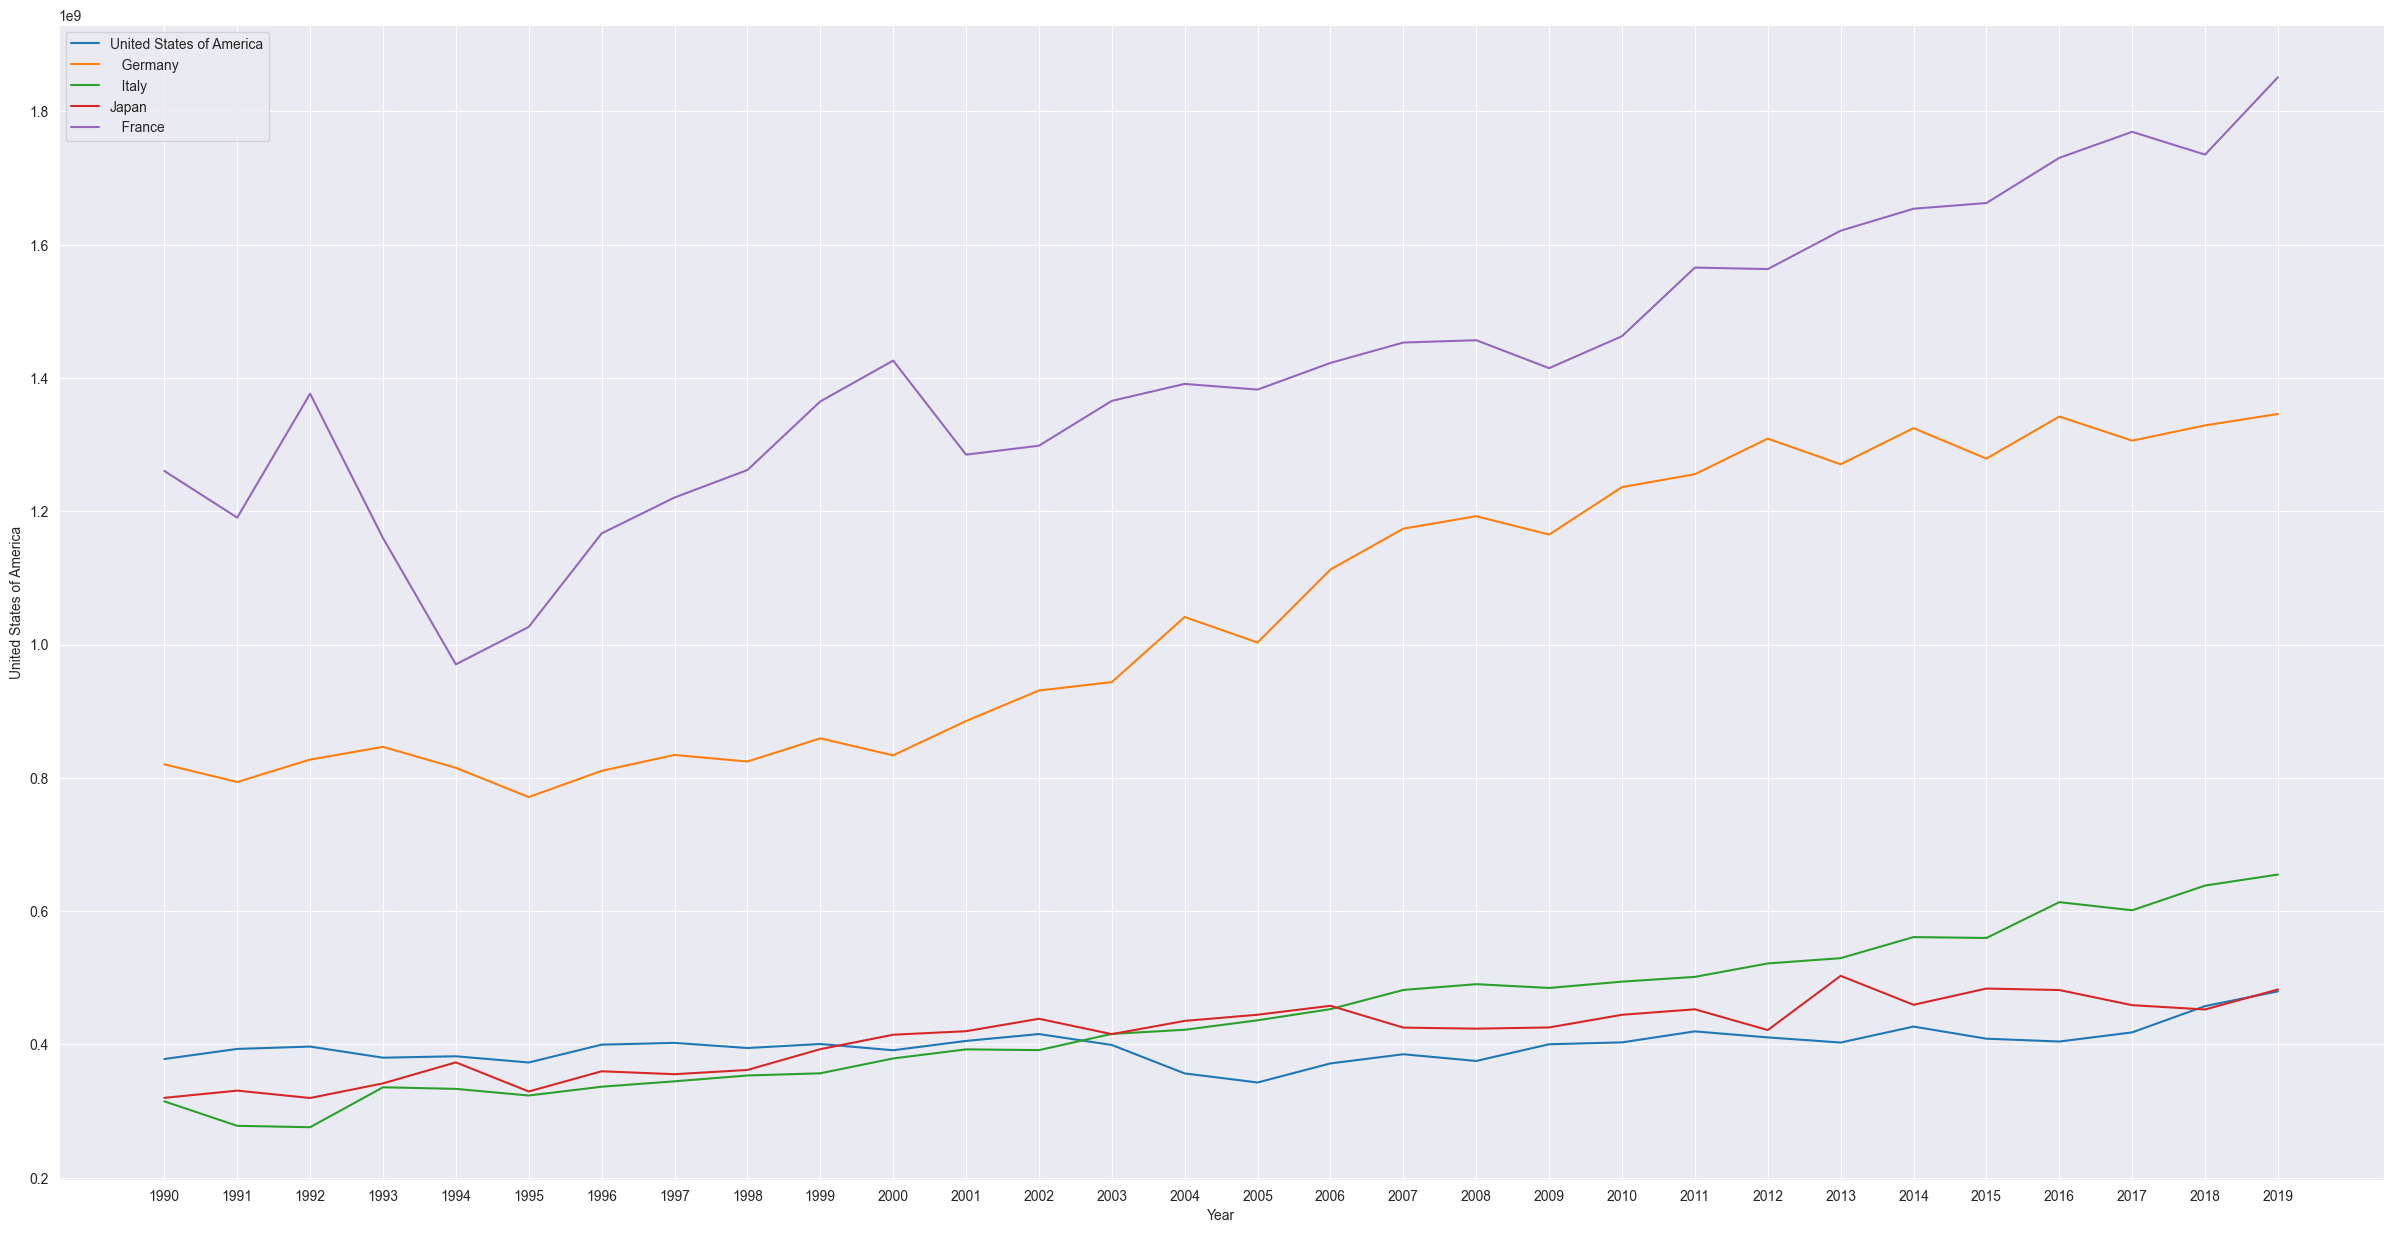

In [440]:
plt.figure(figsize=(30,15))
for country in top_importers.columns.values:
    sns.lineplot(x='Year', y=country, data=top_importers, label=country)

###Analysis of export

In [441]:
df_export = pd.read_csv('Coffee_export.csv')
df_export.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_export
0,Angola,5040000,4260000,4800000,2340000,480000,2460000,3120000,3000000,3240000,...,480000,480000,360000,540000,660000,660000,540000,540000,1380000,43320000
1,Bolivia (Plurinational State of),9360000,4440000,5760000,2820000,5040000,5640000,7380000,6660000,5820000,...,4440000,3780000,3300000,3720000,1800000,1320000,1560000,1320000,1200000,137460000
2,Brazil,1016160000,1270980000,1127460000,1070280000,1036380000,868080000,915060000,1008060000,1088640000,...,2028360000,1712940000,1899060000,-2147483648,-2147483648,2056140000,1855500000,2138220000,-2147483648,33807709056
3,Burundi,35100000,41280000,38760000,25080000,30480000,31680000,13440000,31740000,22440000,...,13080000,23520000,11700000,15120000,13800000,12240000,10140000,12120000,17580000,646200000
4,Cameroon,156660000,105120000,98760000,42300000,32760000,24420000,33840000,82080000,44760000,...,29400000,37320000,16320000,22500000,23400000,16860000,14700000,17220000,15000000,1399920000


In [442]:
print('We have ' + str(df_export.shape) + ' rows and columns respectively.')

We have (55, 32) rows and columns respectively.


In [443]:
df_export[['Total_export']].describe()

,Total_export
count,5.500000e+01
mean,2.851332e+09
std,6.261177e+09
min,1.500000e+06
25%,6.084000e+07
50%,3.160800e+08
75%,2.552670e+09
max,3.380771e+10


In [444]:
df_export.isnull().values.any()

False

In [445]:
top10_export = df_export[['Country', 'Total_export']].sort_values(by=['Total_export'], ascending=False).head(10)
top10_export

,Country,Total_export
2,Brazil,33807709056
51,Viet Nam,24924480000
6,Colombia,19878480000
25,Indonesia,10607940000
24,India,6933960000
19,Guatemala,6464340000
23,Honduras,5964840000
49,Uganda,5632200000
32,Mexico,5628000000
39,Peru,4903920000


Text(0.5, 1.0, 'Top 10 exporters')

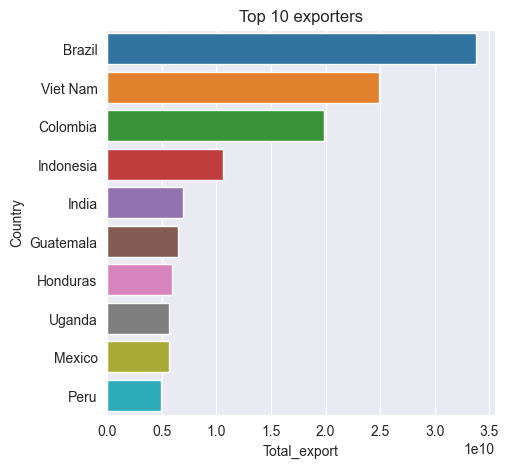

In [446]:
fig, ax = plt.subplots(figsize=(5,5))
g=sns.barplot(data=top10_export, x='Total_export', y='Country')
g.set_title("Top 10 exporters")

In [447]:
top_export1 = df_export[['Country', 'Total_export']].sort_values(by=['Total_export'], ascending=False).head(5)
top_exporters = df_export[df_export.Country.isin(top_export1['Country'].unique())]
top_exporters = top_exporters.T
top_exporters.drop(['Country', 'Total_export'], axis=0, inplace=True)
top_exporters.index.name = 'Year'
top_exporters.columns = top_export1['Country'].values
top_exporters['Brazil'] = abs(top_exporters['Brazil'])
top_exporters.head()

,Brazil,Viet Nam,Colombia,Indonesia,India
Year,,,,,
1990,1016160000,836640000,118740000,414180000,68700000
1991,1270980000,755940000,103620000,370260000,72060000
1992,1127460000,993840000,108960000,276240000,116280000
1993,1070280000,814080000,126120000,339720000,124320000
1994,1036380000,706080000,149760000,276300000,163260000


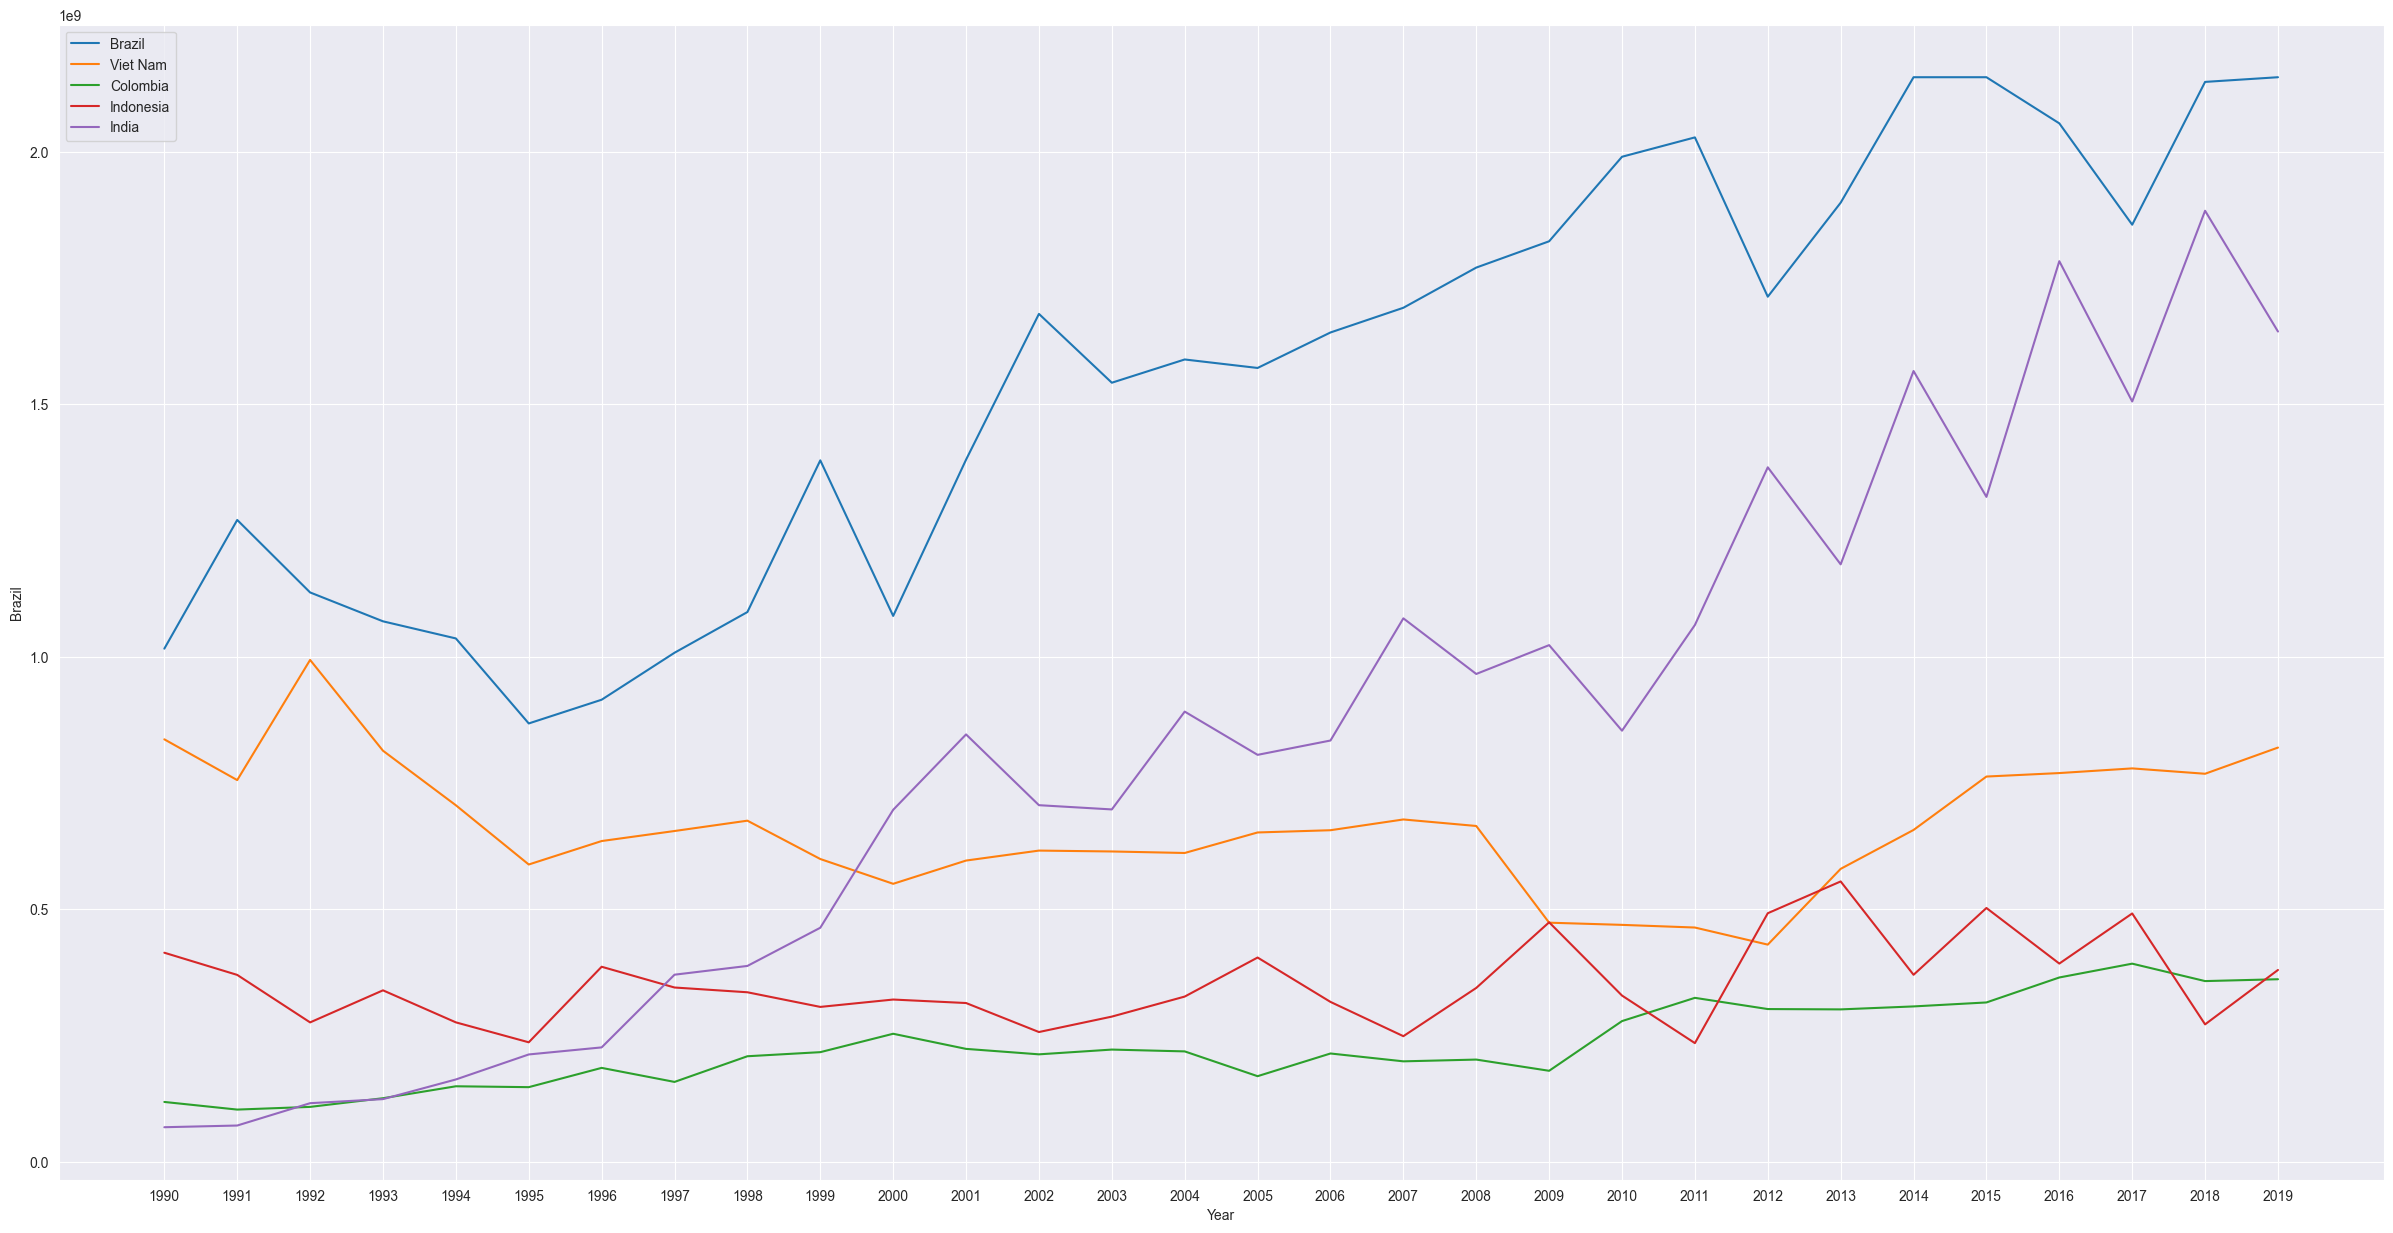

In [448]:
plt.figure(figsize=(30,15))
for country in top_exporters.columns.values:
    sns.lineplot(x='Year', y=country, data=top_exporters, label=country)

###Analysis of domestic consumption

In [449]:
df_domestic_consumption = pd.read_csv('Coffee_domestic_consumption.csv')
df_domestic_consumption.head()

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,Bolivia (Plurinational State of),Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,...,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000
2,Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
3,Burundi,Arabica/Robusta,120000,96000,102000,114600,120000,120000,120000,120000,...,120000,120000,120000,120000,120000,120000,120000,120000,120000,3412020
4,Ecuador,Arabica/Robusta,21000000,21000000,21000000,21000000,21000000,21000000,18000000,18000000,...,9000000,9000000,9300000,9300000,9300000,9300000,9300000,9300000,8940000,381540000


In [450]:
top10_domestic_consumption = df_domestic_consumption[['Country', 'Total_domestic_consumption']].sort_values(by=['Total_domestic_consumption'], ascending=False).head(10)
top10_domestic_consumption

,Country,Total_domestic_consumption
2,Brazil,27824700000
5,Indonesia,4920480000
29,Ethiopia,4536540000
41,Mexico,3189660000
18,Philippines,2807280000
23,Colombia,2536776384
52,Venezuela,2386067999
36,India,2093460000
53,Viet Nam,1920928320
48,Thailand,1248600000


Text(0.5, 1.0, 'Top domestic consumption')

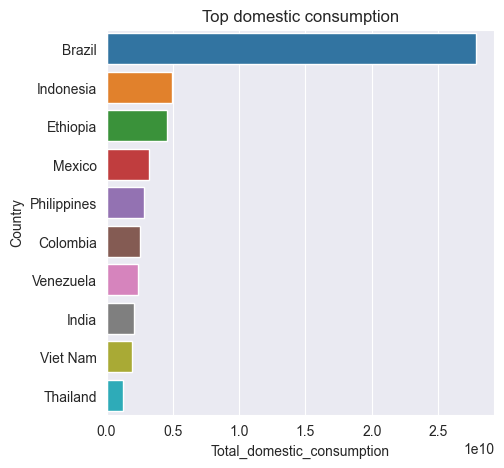

In [451]:
fig, ax = plt.subplots(figsize=(5,5))
g=sns.barplot(data=top10_domestic_consumption, x='Total_domestic_consumption', y='Country')
g.set_title("Top domestic consumption")

In [452]:
df_domestic_consumption['Coffee type'].value_counts()

Arabica            22
Robusta            15
Robusta/Arabica    10
Arabica/Robusta     8
Name: Coffee type, dtype: int64

In [454]:
arabica_domestic_consumption = df_domestic_consumption[['Country', 'Total_domestic_consumption', 'Coffee type']].sort_values(by=['Total_domestic_consumption'], ascending=False)
arabica_domestic_consumption.drop(arabica_domestic_consumption.loc[arabica_domestic_consumption['Coffee type'] == 'Arabica/Robusta'].index, inplace=True)
arabica_domestic_consumption.drop(arabica_domestic_consumption.loc[arabica_domestic_consumption['Coffee type'] == 'Robusta'].index, inplace=True)
arabica_domestic_consumption.drop(arabica_domestic_consumption.loc[arabica_domestic_consumption['Coffee type'] == 'Robusta/Arabica'].index, inplace=True)
arabica_domestic_consumption.head(5)

,Country,Total_domestic_consumption,Coffee type
29,Ethiopia,4536540000,Arabica
23,Colombia,2536776384,Arabica
52,Venezuela,2386067999,Arabica
24,Costa Rica,665335200,Arabica
17,Haiti,600600000,Arabica


In [455]:
robusta_domestic_consumption = df_domestic_consumption[['Country', 'Total_domestic_consumption', 'Coffee type']].sort_values(by=['Total_domestic_consumption'], ascending=False)
robusta_domestic_consumption.drop(robusta_domestic_consumption.loc[robusta_domestic_consumption['Coffee type'] == 'Arabica/Robusta'].index, inplace=True)
robusta_domestic_consumption.drop(robusta_domestic_consumption.loc[robusta_domestic_consumption['Coffee type'] == 'Arabica'].index, inplace=True)
robusta_domestic_consumption.drop(robusta_domestic_consumption.loc[robusta_domestic_consumption['Coffee type'] == 'Robusta/Arabica'].index, inplace=True)
robusta_domestic_consumption.head(5)

,Country,Total_domestic_consumption,Coffee type
6,Madagascar,588705960,Robusta
25,Côte d'Ivoire,410260140,Robusta
39,Lao People's Democratic Republic,157980000,Robusta
33,Guinea,86730000,Robusta
44,Nigeria,70740000,Robusta


In [456]:
a_r_domestic_consumption = df_domestic_consumption[['Country', 'Total_domestic_consumption', 'Coffee type']].sort_values(by=['Total_domestic_consumption'], ascending=False)
a_r_domestic_consumption.drop(a_r_domestic_consumption.loc[a_r_domestic_consumption['Coffee type'] == 'Robusta'].index, inplace=True)
a_r_domestic_consumption.drop(a_r_domestic_consumption.loc[a_r_domestic_consumption['Coffee type'] == 'Arabica'].index, inplace=True)
a_r_domestic_consumption.drop(a_r_domestic_consumption.loc[a_r_domestic_consumption['Coffee type'] == 'Robusta/Arabica'].index, inplace=True)
a_r_domestic_consumption.head(5)

,Country,Total_domestic_consumption,Coffee type
2,Brazil,27824700000,Arabica/Robusta
41,Mexico,3189660000,Arabica/Robusta
16,Dominican Republic,642823380,Arabica/Robusta
32,Guatemala,590880000,Arabica/Robusta
4,Ecuador,381540000,Arabica/Robusta


In [457]:
r_a_domestic_consumption = df_domestic_consumption[['Country', 'Total_domestic_consumption', 'Coffee type']].sort_values(by=['Total_domestic_consumption'], ascending=False)
r_a_domestic_consumption.drop(r_a_domestic_consumption.loc[r_a_domestic_consumption['Coffee type'] == 'Robusta'].index, inplace=True)
r_a_domestic_consumption.drop(r_a_domestic_consumption.loc[r_a_domestic_consumption['Coffee type'] == 'Arabica'].index, inplace=True)
r_a_domestic_consumption.drop(r_a_domestic_consumption.loc[r_a_domestic_consumption['Coffee type'] == 'Arabica/Robusta'].index, inplace=True)
r_a_domestic_consumption.head(5)

,Country,Total_domestic_consumption,Coffee type
5,Indonesia,4920480000,Robusta/Arabica
18,Philippines,2807280000,Robusta/Arabica
36,India,2093460000,Robusta/Arabica
53,Viet Nam,1920928320,Robusta/Arabica
48,Thailand,1248600000,Robusta/Arabica
